# GHMC Ward Level Data Set Showing Agency Wise details for different Works
                                    
    by IDFC Institute

Allocation of Funds & Expenditure for financial year 2014-15 to 2016-17

**Background:**

1. This data was complied through multiple RTI's and petitioning the High Court.

2. The Dataset covers all invoices by the GHMC over the last 3 years.

**Goals**: To analyse and visualize the dataset through various types of charts for public dissemination. 


**Research Questions which can be answered through this dataset:**

1. Is there evidence of lack of planning by ward-level officials? This can be shown if many projects are being sanctioned/invoiced just before the fical year ends or right before/after/during rains (Check the seasonality of the project expenditure).

2. What kind of infrastucture are funds being sanctioned towards? Is it hard infrastructure such as Roads, Water Supply, etc. or softer infrastructure such as Parks & Sports and Lighting?

3. What are the different kind of anomalies that are present in the data?

**Research Questions for which we will be needing additional datasets to be merged:**

1. How does ward level data on project expenditure correlate with the electoral ward level data? Does party affliation play a big role? (I did create an electoral dataset of the 2016 GHMC elections for this) - This is still to be done.


**Key Statistics of the Dataset:**

There are *150* Wards under the GHMC. 

Total Entries: 59,420 (including totals of Wards)

Entries that are the Totals of Wards: 492

Without Totals of Wards: 58,928 entries


Please click below if you would like to see the raw code throughout the slide deck.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

**Importing the neccessary packages required to allow analysis to be conducted:**

In [2]:
import pandas as pd
import numpy as np
import wordcloud as WordCloud
from pandas import Series, DataFrame, Panel
%matplotlib inline
import matplotlib.pyplot as plt
import re

The Dataset Sent by the NGO has been read into the Notebook.

In [3]:
ghmc_data=pd.read_excel('GHMC_Base Data_14_17_15062017.xlsx', 'Base Data',index_col=None, na_values=['NA'])

All Ward Totals (492 entries) that should not be included in calculations have been removed and a dataframe has been created called 'df1' that includes the remaining dataset.


In [4]:
ghmc_data_indexed=ghmc_data.set_index(['Include'])
df1= ghmc_data_indexed[ghmc_data_indexed.index != 0]

The main columns that serve as basis for various analysis done include:
1. Ward Number
2. Ward Name
3. **Sanction Date**
4. **Sanctioned Amount**
5. Vendor Name
6. **Bill Date**
7. **Invoiced Amount**
8. Description of the Project
9. Classification of the Project
10. Status of Completion of the Project

# Summary Statistics for Sanctioned and Invoiced Amounts

In [5]:
list_of_summary_stats=['Mean','Median','Standard Deviation','Kurtosis']
sanction_invoice= df1.loc[:,['Sanction','Invoice Amount']]
sanction_only= sanction_invoice.loc[:,'Sanction']
sanction_mean=sanction_only.mean()
sanction_median=sanction_only.median()
sanction_stdev=sanction_only.std()
sanction_kurtosis=sanction_only.kurtosis()
sanction_stats=[sanction_mean,sanction_median,sanction_stdev,sanction_kurtosis]
sanction_stats_list=list(sanction_stats)
sanction_dataframe=pd.DataFrame(sanction_stats_list,list_of_summary_stats)
sanction_dataframe.columns = ['Sanction']

invoice_only= sanction_invoice.loc[:,'Invoice Amount']
invoice_mean=invoice_only.mean()
invoice_median=invoice_only.median()
invoice_stdev=invoice_only.std()
invoice_kurtosis=invoice_only.kurtosis()
invoice_stats=[invoice_mean,invoice_median,invoice_stdev,invoice_kurtosis]
invoice_stats_list=list(invoice_stats)
invoice_dataframe=pd.DataFrame(invoice_stats_list,list_of_summary_stats)
invoice_dataframe.columns = ['Invoice Amount']
frames = [sanction_dataframe, invoice_dataframe]
sanction_invoice_dataframe= pd.concat(frames, axis=1, join='inner')
print(sanction_invoice_dataframe)

                        Sanction  Invoice Amount
Mean                2.413945e+06    5.349654e+05
Median              3.620000e+05    1.701320e+05
Standard Deviation  3.807108e+07    2.416737e+06
Kurtosis            6.081728e+03    6.549278e+03


Sanction Amount Average: 2.5 million INR

Invoice Amount Average: 500 thousand INR

Reasons for such a large disparity:
1. There is a lot higher variation in Sanction Amount than Invoiced Amounts.
2. A lot of projects that have been sanctioned are still in progress (hence, have lower invoiced amounts).

I use the Sanction Date and Bill Date as indexes in order to plot *timeseries charts* for Sanction Amounts and Invoiced Amounts.

A problem with this dataset is that while all Bill Dates entries are present, there are **36,011 blanks** in the 'Sanction Date' column (which is around *70% of the total number of entries*).

These blanks will effect findings as blank (NA) values are removed as can be seen below.



Difference between Sanction Date and Invoice Date:


[Timedelta('258 days 14:29:42.327529'), Timedelta('149 days 00:00:00')]


The average time period between the sanction date and the bill date of all projects is 258 days (exactly 8.5 months).

The median of the difference is 149 days (approximately 5 months).

However, this finding is unreliable due to the number of blanks present in the Sanction Date of Projects.


Furthermore:

** Each Time Series chart's X-Axis has been binned into the total amount spent per week.**

This has been done in order to get a better picture for time series analysis.

# Sanctioned and Invoiced Amounts for all 3 years


Creating an index of 'Sanction Date' (sd) and 'Bill Date' (bd): 


Sanctioned Amount for 2014-2017:



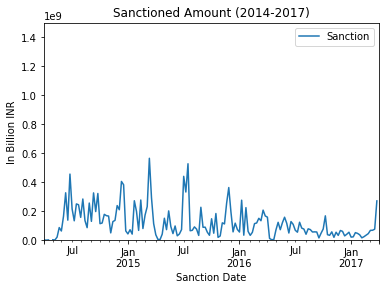

Invoiced Amount for 2014-2017:



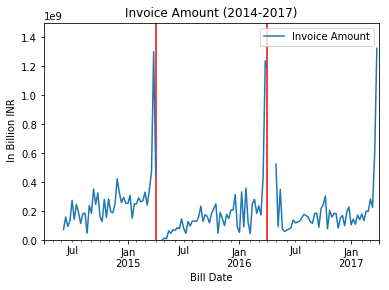

In [6]:
dates_seperators=list(['2015-03-31','2016-03-31'])
df_indexed_sd=df1.set_index(['Sanction Date'])
df_bin_sd=df_indexed_sd.resample('W').sum()
df_sorted_index_sd = df_bin_sd.sort_index(axis=0, level=None, ascending=True,inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
sanction_amount= df_sorted_index_sd.loc[:,['Sanction']]
df_indexed_bd= df1.set_index(['Bill Date'])
df_bin_bd=df_indexed_bd.resample('W').sum()
df_sorted_index_bd = df_bin_bd.sort_index(axis=0, level=None, ascending=True,inplace=False, kind='quicksort', na_position='last',sort_remaining=True, by=None)
bill_amount= df_sorted_index_bd.loc[:,['Invoice Amount']]
#for all 3 years
print('Sanctioned Amount for 2014-2017:\n')
sanction_amount['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim= (0, 1500000000),title='Sanctioned Amount (2014-2017)').set_ylabel("In Billion INR")
plt.show()
#for all 3 years
print('Invoiced Amount for 2014-2017:\n')
bill_amount['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,1.5e9),title='Invoice Amount (2014-2017)').set_ylabel(" In Billion INR")
plt.vlines(x=dates_seperators, ymin=0, ymax=1500000000,color='r')
plt.show()

*Note: The red lines indicate the end of the fiscal year.*

Two points can be seen clearly through this:

1. There is a huge uptick in amounts sanctioned and invoiced as the fiscal year ends (Feb-March). 
2. Sanctioned Amounts are really low as compared to Invoiced Amounts (due to the blanks in the Sanction Date).

# Sanctioned and Invoiced Amounts for the entire year

FY 2014-15:



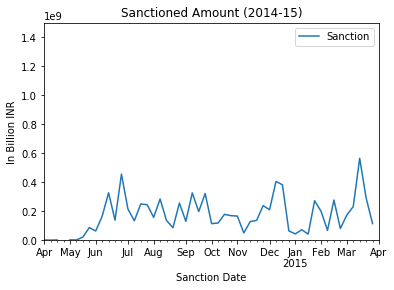

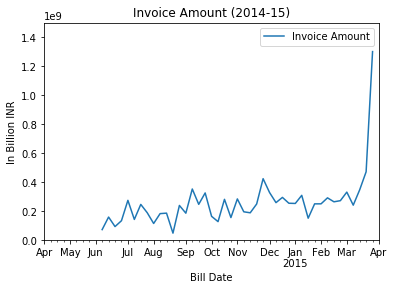

FY 2015-16:



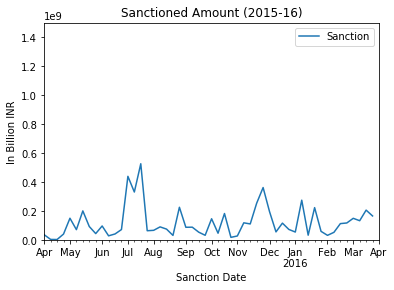

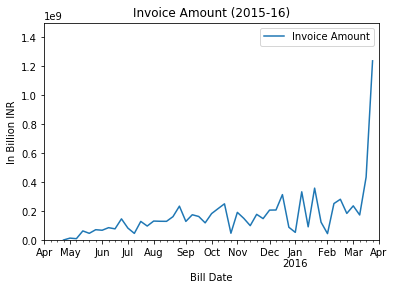

FY 2016-17:



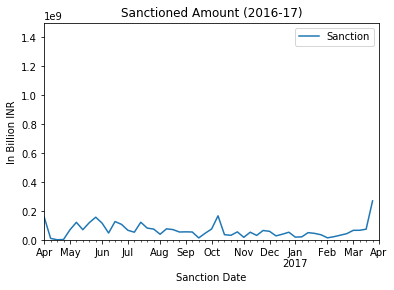

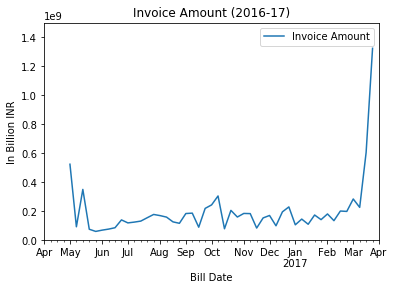

In [7]:
print('FY 2014-15:\n')
sanction_amount['2014-04-01':'2015-03-31'].plot(xlim=('2014-04-01','2015-03-31'),ylim= (0, 1.5e9),title='Sanctioned Amount (2014-15)').set_ylabel("In Billion INR")
plt.show()
bill_amount['2014-04-01':'2015-03-31'].plot(xlim=('2014-04-01','2015-03-31'),ylim=(0,1.5e9),title='Invoice Amount (2014-15)').set_ylabel("In Billion INR")
plt.show()
print('FY 2015-16:\n')
sanction_amount['2015-04-01':'2016-03-31'].plot(xlim=('2015-04-01','2016-03-31'),ylim= (0, 1.5e9),title='Sanctioned Amount (2015-16)').set_ylabel("In Billion INR")
bill_amount['2015-04-01':'2016-03-31'].plot(xlim=('2015-04-01','2016-03-31'),ylim=(0,1.5e9),title='Invoice Amount (2015-16)').set_ylabel("In Billion INR")
plt.show()
print('FY 2016-17:\n')
sanction_amount['2016-04-01':'2017-03-31'].plot(xlim=('2016-04-01','2017-03-31'),ylim= (0, 1.5e9),title='Sanctioned Amount (2016-17)').set_ylabel("In Billion INR")
bill_amount['2016-04-01':'2017-03-31'].plot(xlim=('2016-04-01','2017-03-31'),ylim=(0,1.5e9),title='Invoice Amount (2016-17)').set_ylabel("In Billion INR")
plt.show()

# Sanctioned Amounts for Feb-April (just before Fiscal Year ends)

*FY 2013-14:*



Sanctioned Amounts for Feb-April (just before Fiscal Year ends):



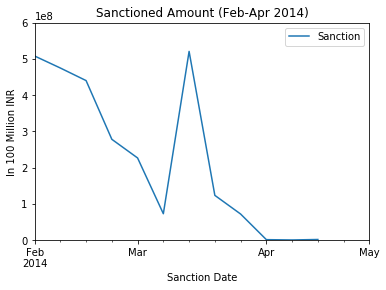

In [8]:
#before the fiscal year ends
print('\nSanctioned Amounts for Feb-April (just before Fiscal Year ends):\n')
sanction_amount['2014-02-01':'2014-04-30'].plot(xlim=('2014-02-01','2014-04-30'),ylim= (0, 6e8),title='Sanctioned Amount (Feb-Apr 2014)').set_ylabel("In 100 Million INR")


2013-14: A lot of Projects are sanctioned in between February-March before the end of the fiscal year.



*FY 2014-15:*


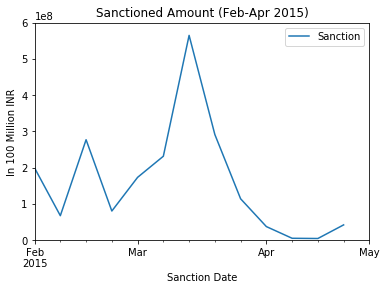

In [9]:
sanction_amount['2015-02-01':'2015-04-30'].plot(xlim=('2015-02-01','2015-04-30'),ylim= (0, 6e8),title='Sanctioned Amount (Feb-Apr 2015)').set_ylabel("In 100 Million INR")


2014-15: In the same way, it can be seen that a lot of projects are sanctioned in February-March before the fiscal year ends.

**Is this indicative of lack of planning by municipal officials?**



*FY 2015-16:*


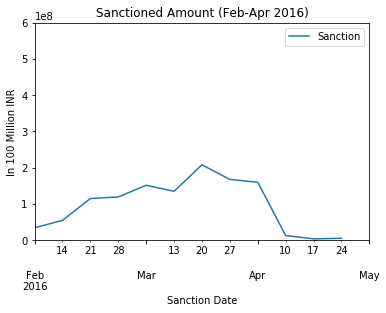

In [10]:
sanction_amount['2016-02-01':'2016-04-30'].plot(xlim=('2016-02-01','2016-04-30'),ylim= (0, 6e8),title='Sanctioned Amount (Feb-Apr 2016)').set_ylabel("In 100 Million INR")


2015-16: A difference can be observed in 2016, where lower amounts were spent in February-March.


**There were GHMC elections in February 2016.** 

Is it that during election year, the entire GHMC goes into lockdown with hardly any projects being sanctioned or invoiced?



*FY 2016-17:*


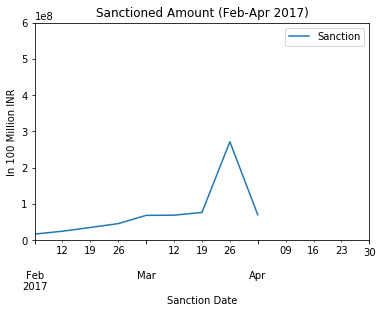

In [11]:
sanction_amount['2017-02-01':'2017-04-30'].plot(xlim=('2017-02-01','2017-04-30'),ylim= (0, 6e8),title='Sanctioned Amount (Feb-Apr 2017)').set_ylabel("In 100 Million INR")


2016-17: It seems that in 2017, the process was back to normal as funds were sanctioned just before the fiscal year ended.


# Sanctioned Amounts during the Monsoon Period

The Monsoon Period is defined as:

"The period from June to September constitute the South-west monsoon (SW rainy) season, while October
and November form the post monsoon (NE rainy) season."

Source: [2011 India Census](http://www.censusindia.gov.in/2011census/dchb/2805_PART_A_DCHB_HYDERABAD.pdf)


Sanctioned Amounts during the Monsoon Period:



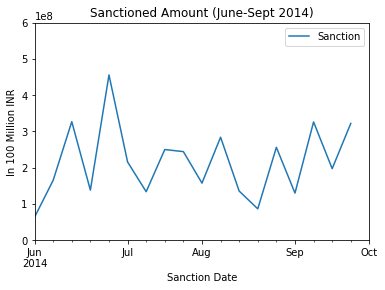

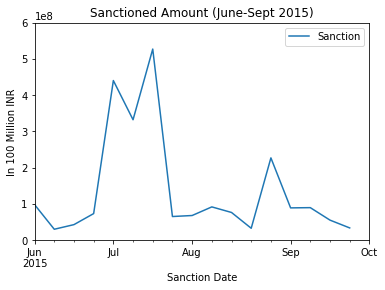

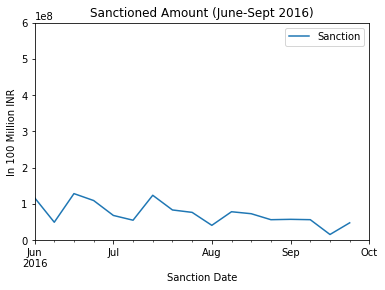

In [12]:
#during the monsoon period
print('\nSanctioned Amounts during the Monsoon Period:\n')
sanction_amount['2014-06-01':'2014-09-30'].plot(xlim=('2014-06-01','2014-09-30'),ylim= (0, 6e8),title='Sanctioned Amount (June-Sept 2014)').set_ylabel("In 100 Million INR")
sanction_amount['2015-06-01':'2015-09-30'].plot(xlim=('2015-06-01','2015-09-30'),ylim= (0, 6e8),title='Sanctioned Amount (June-Sept 2015)').set_ylabel("In 100 Million INR")
sanction_amount['2016-06-01':'2016-09-30'].plot(xlim=('2016-06-01','2016-09-30'),ylim= (0, 6e8),title='Sanctioned Amount (June-Sept 2016)').set_ylabel("In 100 Million INR")

As can be seen:

1. Weeks in June and July seems to usually have higher amounts sanctioned (peaks of the time period).

2. In 2016, there is lower amounts sanctioned (election impact?)


# Invoiced Amount just before the Fiscal Year Ends


Invoiced Amount just before the Fiscal Year Ends:



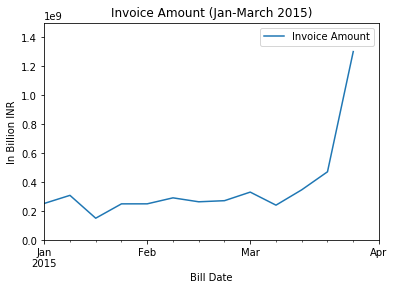

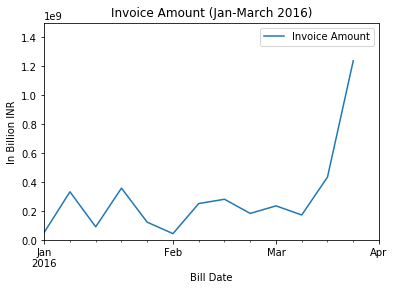

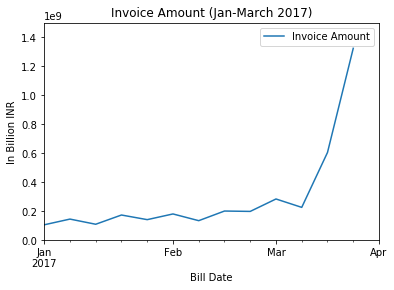

In [13]:
#Invoiced Amount just before the Fiscal Year Ends
print('\nInvoiced Amount just before the Fiscal Year Ends:\n')
bill_amount['2015-01-01':'2015-03-31'].plot(xlim=('2015-01-01','2015-03-31'),ylim=(0,1.5e9),title='Invoice Amount (Jan-March 2015)').set_ylabel("In Billion INR")
bill_amount['2016-01-01':'2016-03-31'].plot(xlim=('2016-01-01','2016-03-31'),ylim=(0,1.5e9),title='Invoice Amount (Jan-March 2016)').set_ylabel("In Billion INR")
bill_amount['2017-01-01':'2017-03-31'].plot(xlim=('2017-01-01','2017-03-31'),ylim=(0,1.5e9),title='Invoice Amount (Jan-March 2017)').set_ylabel("In Billion INR")

Large sums of invoices are given just before the end of the fiscal year (across all 3 years).

These graphs are almost identical, potraying the rush by municipal officials to invoice projects at the end of the year (**to show proof of work done**).

# Invoiced Amount during the Monsoon Period in each year


Invoiced Amount during the Monsoon Period in each year:



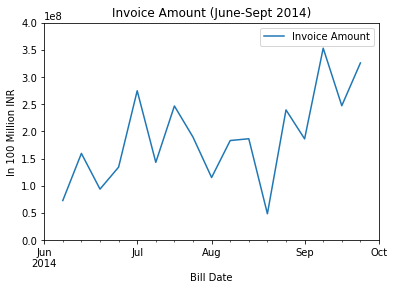

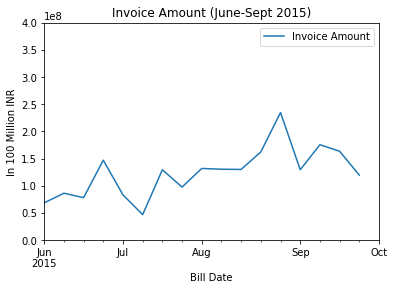

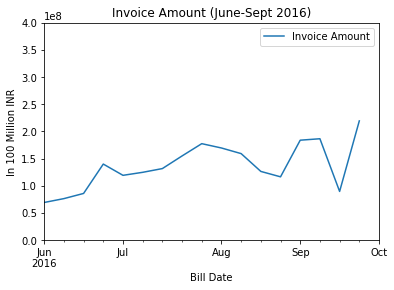

In [14]:
#Invoiced Amount during the Monsoon Period in each year
print('\nInvoiced Amount during the Monsoon Period in each year:\n')
bill_amount['2014-06-01':'2014-09-30'].plot(xlim=('2014-06-01','2014-09-30'),ylim=(0,4e8),title='Invoice Amount (June-Sept 2014)').set_ylabel("In 100 Million INR")
bill_amount['2015-06-01':'2015-09-30'].plot(xlim=('2015-06-01','2015-09-30'),ylim=(0,4e8),title='Invoice Amount (June-Sept 2015)').set_ylabel("In 100 Million INR")
bill_amount['2016-06-01':'2016-09-30'].plot(xlim=('2016-06-01','2016-09-30'),ylim=(0,4e8),title='Invoice Amount (June-Sept 2016)').set_ylabel("In 100 Million INR")

No real trend is observed in for invoices during the monsoon time period. 

# Sanctioned and Invoiced Amounts before the 2016 Election

Sanctioned Amount before the Feb 2016 election:



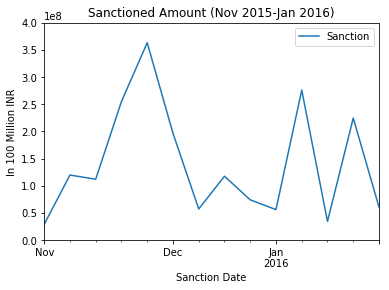

Invoiced Amount before the Feb 2016 election:



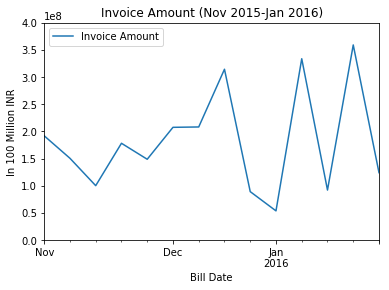

In [15]:
print('Sanctioned Amount before the Feb 2016 election:\n')
sanction_amount['2015-11-01':'2016-01-31'].plot(xlim=('2015-11-01','2016-01-31'),ylim=(0,4e8),title='Sanctioned Amount (Nov 2015-Jan 2016)').set_ylabel("In 100 Million INR")
plt.show()
print('Invoiced Amount before the Feb 2016 election:\n')
bill_amount['2015-11-01':'2016-01-31'].plot(xlim=('2015-11-01','2016-01-31'),ylim=(0,4e8),title='Invoice Amount (Nov 2015-Jan 2016)').set_ylabel("In 100 Million INR")
plt.show()

Similarly, no trend is really observed from the amounts sanctioned and invoiced in the months leading upto the election.

# Status of Projects

*In General:*

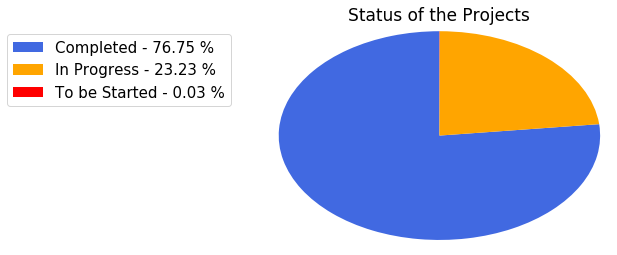

In [16]:
r= np.char.array(['Completed','In Progress','To be Started'])
k = np.array([45222,13688,15])
colors = ['royalblue','orange','red']
porcent = 100.*k/k.sum()

patches, texts = plt.pie(k, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(r, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, k),
                                          key=lambda r: r[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
plt.title('Status of the Projects',fontsize=17)
#plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

*Based on Total Amounts Sanctioned:*

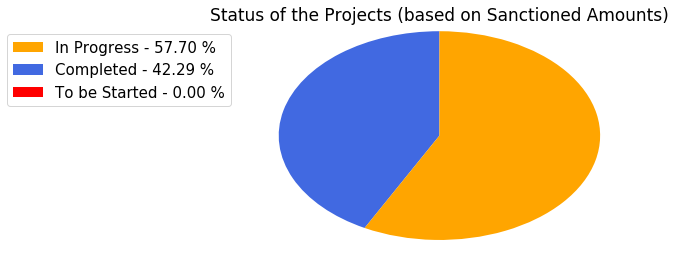

In [17]:
completed_total= df1.groupby('Status of Completion')['Sanction'].sum()['Completed']
progress_total= df1.groupby('Status of Completion')['Sanction'].sum()['Progress']
tbs_total= df1.groupby('Status of Completion')['Sanction'].sum()['To be Started']
r= np.char.array(['Completed','In Progress','To be Started'])
k = np.array([completed_total,progress_total,tbs_total])
colors = ['royalblue','orange','red']
porcent = 100.*k/k.sum()

patches, texts = plt.pie(k, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(r, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, k),
                                          key=lambda r: r[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
plt.title('Status of the Projects (based on Sanctioned Amounts)',fontsize=17)
#plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

This seems to make sense as the larger projects (more amount sanctioned) would usually have a longer time period attached to them. Hence, a majority of the large projects seem to be in progress.



*Based on Total Amounts Invoiced:*

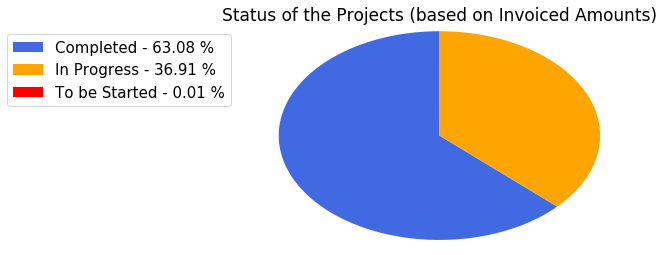

In [18]:
completed_total_invoice= df1.groupby('Status of Completion')['Invoice Amount'].sum()['Completed']
progress_total_invoice= df1.groupby('Status of Completion')['Invoice Amount'].sum()['Progress']
tbs_total_invoice= df1.groupby('Status of Completion')['Invoice Amount'].sum()['To be Started']
totals_combined_invoice=completed_total_invoice,progress_total_invoice,tbs_total_invoice
r= np.char.array(['Completed','In Progress','To be Started'])
k = np.array([completed_total_invoice,progress_total_invoice,tbs_total_invoice])
colors = ['royalblue','orange','red']
porcent = 100.*k/k.sum()

patches, texts = plt.pie(k, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(r, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, k),
                                          key=lambda r: r[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
plt.title('Status of the Projects (based on Invoiced Amounts)',fontsize=17)
#plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

This makes sense as you would expect the completed projects to have a larger portion of money invoiced for them. 


# Types of Infrastructure Projects

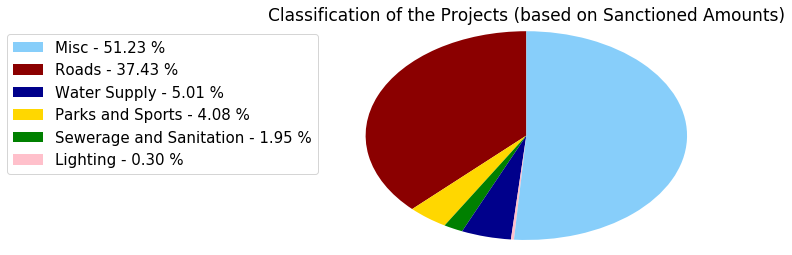

In [19]:
roads_total= df1.groupby('Classification')['Sanction'].sum()['Roads']
ps_total=df1.groupby('Classification')['Sanction'].sum()['Parks and Sports']
ss_total=df1.groupby('Classification')['Sanction'].sum()['Sewerage and Sanitation']
ws_total=df1.groupby('Classification')['Sanction'].sum()['Water Supply']
light_total=df1.groupby('Classification')['Sanction'].sum()['Lighting']
misc_total=df1.groupby('Classification')['Sanction'].sum()['Misc']

x = np.char.array(['Roads','Parks and Sports','Sewerage and Sanitation','Water Supply','Lighting','Misc'])
y = np.array([roads_total,ps_total,ss_total,ws_total,light_total,misc_total])
colors = ['darkred','gold','green','darkblue','pink','lightskyblue']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
        fontsize=15)
plt.title('Classification of the Projects (based on Sanctioned Amounts)',fontsize=17)
plt.show()

As can be seen, 'Miscellaneous' projects account for over half of the total amount invested in the various types of projects. However, since we want the answer for hard v. soft infrastructure, we should drop 'Miscellaneous' expenditures for the time being. 


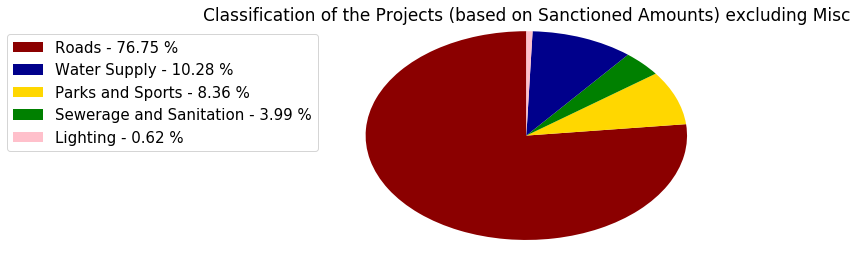

In [20]:
#Removing Miscellaneous from the classification:
a= np.char.array(['Roads','Parks and Sports','Sewerage and Sanitation','Water Supply','Lighting'])
b = np.array([roads_total,ps_total,ss_total,ws_total,light_total])
colors = ['darkred','gold','green','darkblue','pink']
porcent = 100.*b/b.sum()

patches, texts = plt.pie(b, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(a, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, b),
                                          key=lambda a: a[2],
                                          reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
plt.title('Classification of the Projects (based on Sanctioned Amounts) excluding Misc',fontsize=17)
plt.show()

As can be seen, when we remove the projects classified as 'Miscellaneous', investments in 'Roads' make up more than 3/4th of the remaining amount sanctioned. Water Supply projects follow with around 10.3% while Lighting projects only account for 0.6%.

However, the way these projects have been classified can be misleading. The classification has been done through word parsing of the description of the project searching for certain key words. This has led to errors in certain cases.

# Word Cloud of All Projects

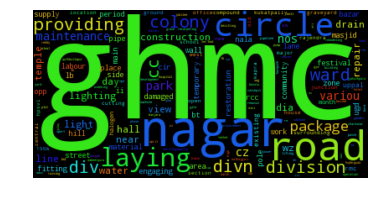

In [21]:
#word cloud of all categories
df_indexed_descriptions=df1.loc[:,['Description','Classification']]
only_final=df_indexed_descriptions.loc[:,'Description']
texta = only_final.str.cat(sep=' ')
from wordcloud import WordCloud
wordcloud = WordCloud().generate(texta)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Cloud of Miscellanous Sanctioned Projects


This is done in order to observe if we can add more classifications and remove the 'Misc' category (accounts for 51.2%):

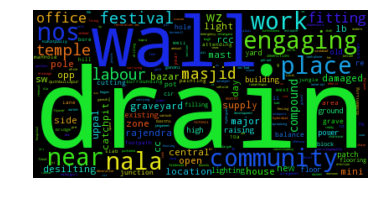

In [22]:
misc_only= df_indexed_descriptions[df_indexed_descriptions['Classification'] == 'Misc']
misc_only_final=misc_only.loc[:,'Description']
text = misc_only_final.str.cat(sep=' ')
#removing ghmc, nagar, divn, circle, division, ward, providing, div, construction, maintenance, 
#colony, cz, package, variou, repair, hall, laying, view
text1=text.replace('ghmc','')
text2=text1.replace('nagar','')
text3=text2.replace('divn','')
text4=text3.replace('circle','')
text5=text4.replace('division','')
text6=text5.replace('ward','')
text7=text6.replace('providing','')
text8=text7.replace('div','')
text9=text8.replace('construction','')
text10=text9.replace('maintenance','')
text11=text10.replace('colony','')
text12=text11.replace('cz','')
text13=text12.replace('package','')
text14=text13.replace('variou','')
text15=text14.replace('repair','')
text16=text15.replace('hall','')
text17=text16.replace('laying','')
text18=text17.replace('view','')
#making a wordcloud for misc
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text18)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Cloud of the Names of Vendors

To see how concentrated the contractors really are (do only a few get all contracts, etc.)

(-0.5, 399.5, 199.5, -0.5)

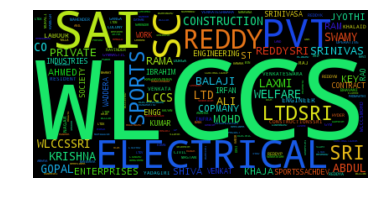

In [23]:
vendors=df1.loc[:,['Vendor Name']]
vendors_only=vendors.loc[:,'Vendor Name']
text = vendors_only.str.cat(sep='')
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

WLCCS: 'Waddera Labour Contract Cooperative Society' comes across as a major key word.

Waddera or Vaddera was apparently an OBC group of the 'stone-cutter' caste, and their labor cooperatives often have reservations for projects (along with SC/ST).There are **5461 projects** that have been allocated to vendors that have 'WLCCS' in their company name. 

Does this have a major effect on project allocations?

What is the process of receiving a contract from the government?

# Analyzing 'Additional' Wards given in Dataset

There are 150 wards in GHMC. 

However, in the dataset, there are 165 wards. Assuming that these 'additional' wards are projects that cover all the wards, they are being analyzed seperately.

In [24]:
all_wards=df1.loc[:,['Ward Number','Ward Name','Sanction','Invoice Amount','Sanction Date','Bill Date','Status of Completion']]

**Project Division Ward:**

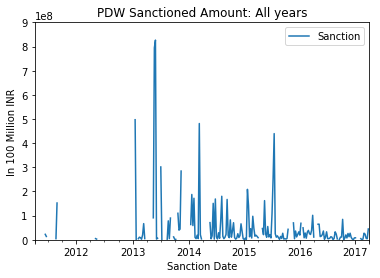

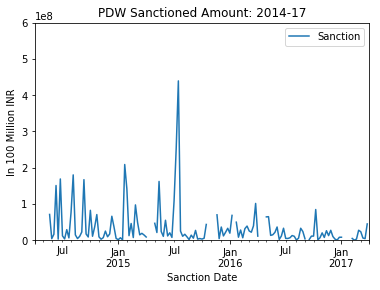

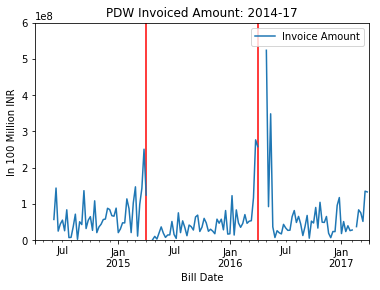

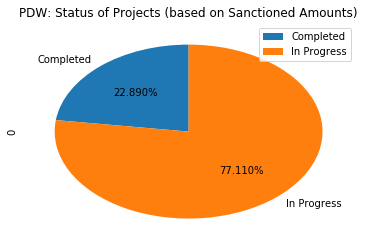

In [25]:
pdw_ward= all_wards[all_wards['Ward Name'] =='Project Division Ward']
pdw_ward_indexed_sd=pdw_ward.set_index(['Sanction Date'])
pdw_ward_bin_sd=pdw_ward_indexed_sd.resample('W').sum()
pdw_ward_sorted_index_sd = pdw_ward_bin_sd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
pdw_project= pdw_ward_sorted_index_sd.loc[:,['Sanction']]
pdw_project['2011-04-01':'2017-03-31'].plot(xlim=('2011-04-01','2017-03-31'),ylim=(0,9e8),title='PDW Sanctioned Amount: All years').set_ylabel("In 100 Million INR")
pdw_project['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,6e8),title='PDW Sanctioned Amount: 2014-17').set_ylabel("In 100 Million INR")
pdw_ward_indexed_bd=pdw_ward.set_index(['Bill Date'])
pdw_ward_bin_bd=pdw_ward_indexed_bd.resample('W').sum()
pdw_ward_sorted_index_bd = pdw_ward_bin_bd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
pdw_project_bd= pdw_ward_sorted_index_bd.loc[:,['Invoice Amount']]
pdw_project_bd['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,6e8),title='PDW Invoiced Amount: 2014-17').set_ylabel("In 100 Million INR")
plt.vlines(x=dates_seperators, ymin=0, ymax=6e8,color='r')
plt.show()
pdw_work= pdw_ward.loc[:,['Status of Completion','Sanction']]
pdw_completed_total=pdw_work.groupby('Status of Completion')['Sanction'].sum()['Completed']
pdw_progress_total= pdw_work.groupby('Status of Completion')['Sanction'].sum()['Progress']
pdw_totals_combined=pdw_completed_total,pdw_progress_total
pdw_totals_combined_list=list(pdw_totals_combined)
pdw_types= 'Completed','In Progress'
pdw_types_list=list(pdw_types)
pdw_total_of_different_types=pd.DataFrame(pdw_totals_combined_list,pdw_types_list)
pdw_total_of_different_types.plot.pie(y=0,labels=pdw_types_list,shadow=False,startangle=90,autopct='%1.3f%%',title='PDW: Status of Projects (based on Sanctioned Amounts)')

What exactly does the Project Division Ward do? Large sums of money do seem to be sanctioned towards it every year.

**Housing Ward (Central Scheme- JNNURM Housing):**

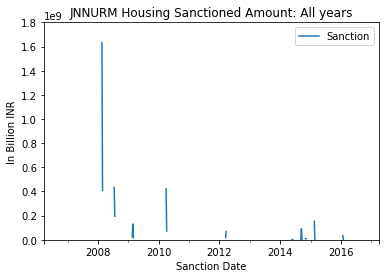

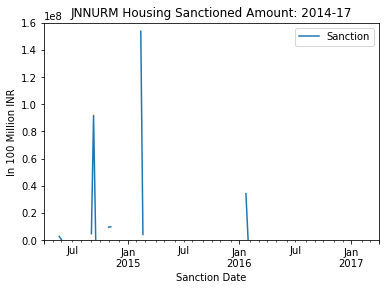

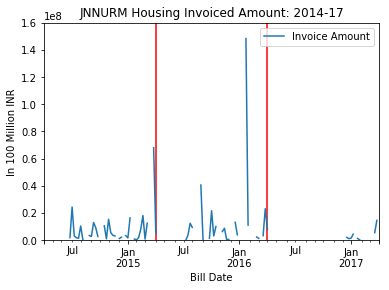

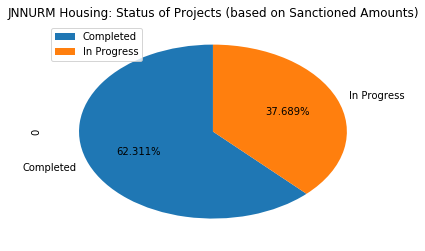

In [26]:
housing_ward=all_wards[all_wards['Ward Name'] =='JNNURM Housing']
housing_ward_indexed_sd=housing_ward.set_index(['Sanction Date'])
housing_ward_bin_sd=housing_ward_indexed_sd.resample('W').sum()
housing_ward_sorted_index_sd = housing_ward_bin_sd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
housing_project= housing_ward_sorted_index_sd.loc[:,['Sanction']]
housing_project['2007-04-01':'2017-03-31'].plot(xlim=('2006-04-01','2017-03-31'),ylim=(0,1.8e9),title='JNNURM Housing Sanctioned Amount: All years').set_ylabel("In Billion INR")
housing_project['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,1.6e8),title='JNNURM Housing Sanctioned Amount: 2014-17').set_ylabel("In 100 Million INR")
housing_ward_indexed_bd=housing_ward.set_index(['Bill Date'])
housing_ward_bin_bd=housing_ward_indexed_bd.resample('W').sum()
housing_ward_sorted_index_bd = housing_ward_bin_bd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
housing_project_bd=housing_ward_sorted_index_bd.loc[:,['Invoice Amount']]
housing_project_bd['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,1.6e8),title='JNNURM Housing Invoiced Amount: 2014-17').set_ylabel("In 100 Million INR")
plt.vlines(x=dates_seperators, ymin=0, ymax=1.6e8,color='r')
plt.show()
housing_work= housing_ward.loc[:,['Status of Completion','Sanction']]
housing_completed_total= housing_work.groupby('Status of Completion')['Sanction'].sum()['Completed']
housing_progress_total= housing_work.groupby('Status of Completion')['Sanction'].sum()['Progress']
housing_totals_combined=housing_completed_total,housing_progress_total
housing_totals_combined_list=list(housing_totals_combined)
housing_types= 'Completed','In Progress'
housing_types_list=list(housing_types)
housing_total_of_different_types=pd.DataFrame(housing_totals_combined_list, housing_types_list)
housing_total_of_different_types.plot.pie(y=0,labels=housing_types_list,shadow=False,startangle=90,autopct='%1.3f%%',title='JNNURM Housing: Status of Projects (based on Sanctioned Amounts)')

A huge amount of meony was sanctioned before 2009, during the Central Government's approval of the scheme.

**SWD1 and SWD2:** 

(We assume that this means Storm Water Drainage (SWD))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.resample() is now a deferred operation
You called sort_index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


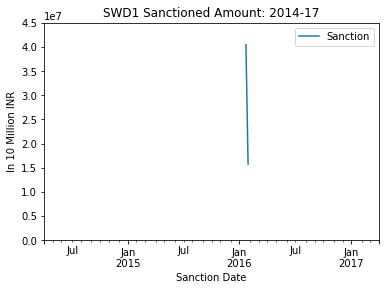

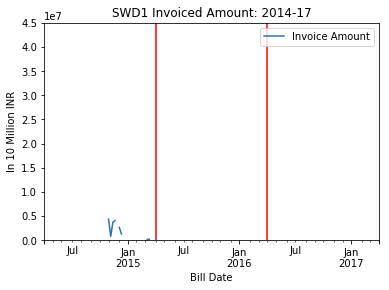

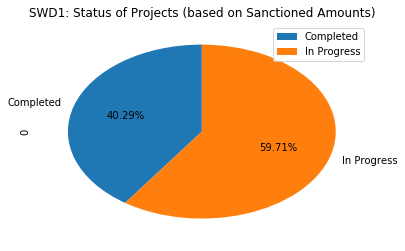

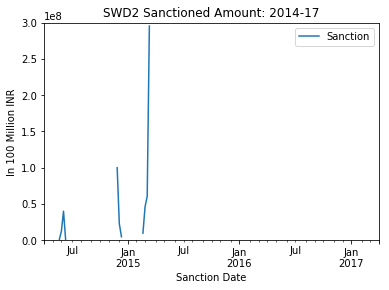

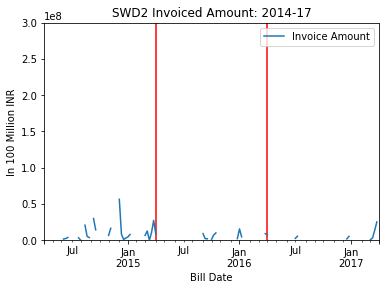

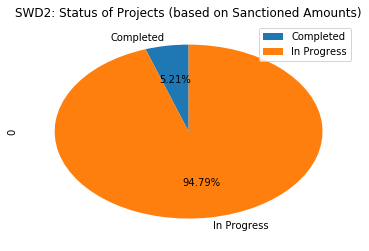

In [27]:
swd1_ward=all_wards[all_wards['Ward Name'] =='SWD Division1']
swd1_ward_indexed_sd=swd1_ward.set_index(['Sanction Date'])
swd1_ward_bin_sd=swd1_ward_indexed_sd.resample('W').sum()
swd1_ward_sorted_index_sd = swd1_ward_bin_sd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
swd1_project= swd1_ward_sorted_index_sd.loc[:,['Sanction']]
swd1_project['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,4.5e7),title='SWD1 Sanctioned Amount: 2014-17').set_ylabel("In 10 Million INR")
swd1_ward_indexed_bd=swd1_ward.set_index(['Bill Date'])
swd1_ward_bin_bd=swd1_ward_indexed_bd.resample('W')
swd1_ward_sorted_index_bd = swd1_ward_bin_bd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
swd1_project_bd= swd1_ward_sorted_index_bd.loc[:,['Invoice Amount']]
swd1_project_bd['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,4.5e7),title='SWD1 Invoiced Amount: 2014-17').set_ylabel("In 10 Million INR")
plt.vlines(x=dates_seperators, ymin=0, ymax=4.5e7,color='r')
plt.show()
swd1_work= swd1_ward.loc[:,['Status of Completion','Sanction']]
swd1_completed_total=swd1_work.groupby('Status of Completion')['Sanction'].sum()['Completed']
swd1_progress_total= swd1_work.groupby('Status of Completion')['Sanction'].sum()['Progress']
swd1_totals_combined=swd1_completed_total,swd1_progress_total
swd1_totals_combined_list=list(swd1_totals_combined)
swd1_types= 'Completed','In Progress'
swd1_types_list=list(swd1_types)
swd1_total_of_different_types=pd.DataFrame(swd1_totals_combined_list,swd1_types_list)
swd1_total_of_different_types.plot.pie(y=0,labels=swd1_types_list,shadow=False,startangle=90,autopct='%1.2f%%',title='SWD1: Status of Projects (based on Sanctioned Amounts)')

swd2_ward=all_wards[all_wards['Ward Name'] =='SWD Division2']
swd2_ward_indexed_sd=swd2_ward.set_index(['Sanction Date'])
swd2_ward_bin_sd=swd2_ward_indexed_sd.resample('W').sum()
swd2_ward_sorted_index_sd = swd2_ward_bin_sd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
swd2_project= swd2_ward_sorted_index_sd.loc[:,['Sanction']]
swd2_project['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,3e8),title='SWD2 Sanctioned Amount: 2014-17').set_ylabel("In 100 Million INR")
swd2_ward_indexed_bd=swd2_ward.set_index(['Bill Date'])
swd2_ward_bin_bd=swd2_ward_indexed_bd.resample('W').sum()
swd2_ward_sorted_index_bd = swd2_ward_bin_bd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
swd2_project_bd= swd2_ward_sorted_index_bd.loc[:,['Invoice Amount']]
swd2_project_bd['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,3e8),title='SWD2 Invoiced Amount: 2014-17').set_ylabel("In 100 Million INR")
plt.vlines(x=dates_seperators, ymin=0, ymax=3e8,color='r')
plt.show()
swd2_work= swd2_ward.loc[:,['Status of Completion','Sanction']]
swd2_completed_total=swd2_work.groupby('Status of Completion')['Sanction'].sum()['Completed']
swd2_progress_total= swd2_work.groupby('Status of Completion')['Sanction'].sum()['Progress']
swd2_totals_combined=swd2_completed_total,swd2_progress_total
swd2_totals_combined_list=list(swd2_totals_combined)
swd2_types= 'Completed','In Progress'
swd2_types_list=list(swd2_types)
swd2_total_of_different_types=pd.DataFrame(swd2_totals_combined_list,swd2_types_list)
swd2_total_of_different_types.plot.pie(y=0,labels=swd2_types_list,shadow=False,startangle=90,autopct='%1.2f%%',title='SWD2: Status of Projects (based on Sanctioned Amounts)')

Observations in the SWD1 and SWD2 projects (Storm Water Drainage Projects):

1. Money is sanctioned to each one in turn. For example, when SWD2 received its funding in early 2015 while SWD1 received its funding in early 2016. 

2. SWD2 has a lot higher sanctioned amount and invoiced amount than SWD1

3. SWD1 has a higher completion rate than SWD2, which makes sense based on the lower amount of money it was sanctioned.

4. A lot of projects sanctioned do not have a sanction date, a fact that has skewed the results found.


**Central Emergency Squad:**

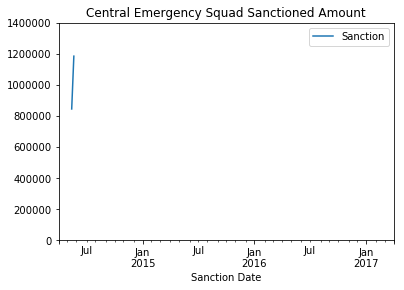

In [28]:
ces_ward=all_wards[all_wards['Ward Name'] =='Central Emergency Squad']
ces_ward_indexed=ces_ward.set_index(['Sanction Date'])
ces_ward_bin=ces_ward_indexed.resample('W').sum()
ces_ward_sorted_index_sd = ces_ward_bin.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
ces_project= ces_ward_sorted_index_sd.loc[:,['Sanction']]
ces_project['2014-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,1.4e6),title='Central Emergency Squad Sanctioned Amount')

It is interesting that money seems to be sanctioned in mid-2014 only as a precaution to Telegana being formed.

**Building Maintenance:**

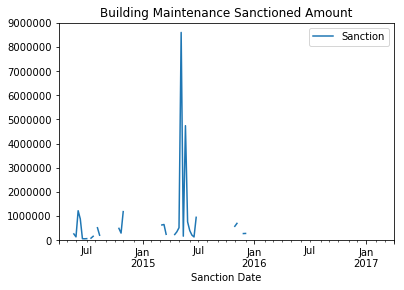

In [29]:
bm_ward=all_wards[all_wards['Ward Name'] =='Building Maintenence']
bm_ward_indexed=bm_ward.set_index(['Sanction Date'])
bm_ward_bin_sd=bm_ward_indexed.resample('W').sum()
bm_ward_sorted_index_sd = bm_ward_bin_sd.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
bm_project= bm_ward_sorted_index_sd.loc[:,['Sanction']]
bm_project['2012-04-01':'2017-03-31'].plot(xlim=('2014-04-01','2017-03-31'),ylim=(0,9e6),title='Building Maintenance Sanctioned Amount')

Expenditure on Building Maintenance happened during the 2015-16 year. 

# Ward Level Analysis

We have created a function (which will become a dashboard) that provides analysis of each ward. 

The dashboard is currently being developed. 

# Key Findings

1. There is a huge uptick in amounts sanctioned and invoiced as the fiscal year ends (Feb-March). Is this indicative of lack of planning by municipal officials?

2. There were GHMC elections in February 2016. The GHMC seems to into lockdown with hardly any projects being sanctioned or invoiced during election year.

3. For Monsoon: Weeks in June and July seems to usually have higher amounts sanctioned (peaks of the time period).

4. Based on the dataset, there is evidence that a lot of projects are sanctioned towards roads and miscellaneous projects.

5. WLCCS comes across as a major key word in company names. 

6. A function for ward level analysis has been created which will soon to converted into a dashboard.


# Questions to be answered


1. There are 36,011 blanks in the 'Sanction Date' column (excluding entries for grand totals). Is it possible to get these blanks filled as the Sanction Date is an important index on which the time series data is analyzed. 

2. There are 150 wards in GHMC. However, in the dataset, there are 165 wards. Are all 'additional' wards projects that span across multiple wards?
 
3. What is the overall scope of the projects that have been collected? Are they all the projects that have been invoiced in those three fiscal years or are there any exclusions?

4. What is the geographic scope of the funds analyzed? How much of these funds are coming from the Central and State governments vs. GHMC?

5. A lot of vendors have the term ‘WLCCS’ in their business name -- what does this stand for exactly? What is the process of giving out contracts to vendors? 

6. A large number of projects are categorised as 'miscellaneous' -- what would be the easiest process to classify these into relevant categories?

7. Is there an unique ‘Project ID’ for every project such that we can track individual projects?


# Data Needed

1. Ward-wise shapefiles of GHMC to do a map-based visualization. (Extensions of shapefiles: .shp, .shx, and .dbf)

2. The population of each ward (if this is not possible, then electoral data from each ward)

3. Feedback on proposed wireframe of dashboard


# Thank You